In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [237]:
train = pd.read_csv('train.csv')
train.rename(columns={'Sales(In ThousandDollars)':'Sales'}, inplace=True)
train.head()

Year  Month ProductCategory   Sales
0  2009      1   WomenClothing  1755.0
1  2009      1     MenClothing   524.0
2  2009      1   OtherClothing   936.0
3  2009      2   WomenClothing  1729.0
4  2009      2     MenClothing   496.0

In [238]:
train.dropna(subset=['Sales'], inplace=True)

In [239]:
test = pd.read_csv('test.csv')
test.drop('Sales(In ThousandDollars)',axis=1,inplace=True)
test.head()

Year  Month ProductCategory
0  2015      1   WomenClothing
1  2015      1     MenClothing
2  2015      1   OtherClothing
3  2015      2   WomenClothing
4  2015      2     MenClothing

In [240]:
econ = pd.read_excel('macro_economic.xlsx', na_values='?')
econ.head()

Year-Month  Monthly Nominal GDP Index (inMillion$)  \
0  2009 - Jan                            14421.752895   
1  2009 - Feb                            14389.200466   
2  2009 - Mar                            14340.701639   
3  2009 - Apr                            14326.815525   
4  2009 - May                            14345.904809   

   Monthly Real GDP Index (inMillion$)      CPI PartyInPower  \
0                         14407.053343  233.402    Democrats   
1                         14366.176571  234.663    Democrats   
2                         14351.786822  235.067    Democrats   
3                         14351.601731  235.582    Democrats   
4                         14368.123959  235.975    Democrats   

   unemployment rate  CommercialBankInterestRateonCreditCardPlans  \
0                7.8                                        12.03   
1                8.3                                        12.97   
2                8.7                                        12.97   
3                9.0                                        12.97   
4                9.4                                        13.32   

   Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan  \
0                                              11.44                   
1                                              11.05                   
2                                              11.05                   
3                                              11.05                   
4                                              11.25                   

   Earnings or wages  in dollars per hour  \
0                                   22.05   
1                                   22.22   
2                                   22.22   
3                                   22.13   
4                                   22.04   

   AdvertisingExpenses (in Thousand Dollars)  \
0                                      137.0   
1                                      200.0   
2                                        NaN   
3                                      214.0   
4                                        NaN   

   Cotton Monthly Price - US cents per Pound(lbs)  Change(in%)  \
0                                           57.70         4.02   
1                                           55.21        -4.32   
2                                           51.50        -6.72   
3                                           56.78        10.25   
4                                           61.95         9.11   

   Average upland planted(million acres)  \
0                                  9.296   
1                                  9.296   
2                                  9.296   
3                                  9.296   
4                                  9.297   

   Average upland harvested(million acres)  yieldperharvested acre  \
0                                    7.559                     799   
1                                    7.559                     799   
2                                    7.559                     799   
3                                    7.559                     787   
4                                    7.400                     803   

   Production (in  480-lb netweright in million bales)  \
0                                             12.589     
1                                             12.589     
2                                             12.589     
3                                             12.400     
4                                             12.384     

   Mill use  (in  480-lb netweright in million bales)  Exports  
0                                               4.17    11.550  
1                                               3.87    11.100  
2                                               3.72    11.650  
3                                               3.62    12.225  
4                                               3.52    12.300

In [241]:
econ['Year'] = econ['Year-Month'].str[:4].astype(int)
econ['Month'] = econ['Year-Month'].str[-3:].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
                                                    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
                                                    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})
econ.drop('Year-Month',axis=1,inplace=True)
econ.head()

Monthly Nominal GDP Index (inMillion$)  \
0                            14421.752895   
1                            14389.200466   
2                            14340.701639   
3                            14326.815525   
4                            14345.904809   

   Monthly Real GDP Index (inMillion$)      CPI PartyInPower  \
0                         14407.053343  233.402    Democrats   
1                         14366.176571  234.663    Democrats   
2                         14351.786822  235.067    Democrats   
3                         14351.601731  235.582    Democrats   
4                         14368.123959  235.975    Democrats   

   unemployment rate  CommercialBankInterestRateonCreditCardPlans  \
0                7.8                                        12.03   
1                8.3                                        12.97   
2                8.7                                        12.97   
3                9.0                                        12.97   
4                9.4                                        13.32   

   Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan  \
0                                              11.44                   
1                                              11.05                   
2                                              11.05                   
3                                              11.05                   
4                                              11.25                   

   Earnings or wages  in dollars per hour  \
0                                   22.05   
1                                   22.22   
2                                   22.22   
3                                   22.13   
4                                   22.04   

   AdvertisingExpenses (in Thousand Dollars)  \
0                                      137.0   
1                                      200.0   
2                                        NaN   
3                                      214.0   
4                                        NaN   

   Cotton Monthly Price - US cents per Pound(lbs)  Change(in%)  \
0                                           57.70         4.02   
1                                           55.21        -4.32   
2                                           51.50        -6.72   
3                                           56.78        10.25   
4                                           61.95         9.11   

   Average upland planted(million acres)  \
0                                  9.296   
1                                  9.296   
2                                  9.296   
3                                  9.296   
4                                  9.297   

   Average upland harvested(million acres)  yieldperharvested acre  \
0                                    7.559                     799   
1                                    7.559                     799   
2                                    7.559                     799   
3                                    7.559                     787   
4                                    7.400                     803   

   Production (in  480-lb netweright in million bales)  \
0                                             12.589     
1                                             12.589     
2                                             12.589     
3                                             12.400     
4                                             12.384     

   Mill use  (in  480-lb netweright in million bales)  Exports  Year  Month  
0                                               4.17    11.550  2009      1  
1                                               3.87    11.100  2009      2  
2                                               3.72    11.650  2009      3  
3                                               3.62    12.225  2009      4  
4                                               3.52    12.300  2009      5

In [242]:
weather = pd.read_excel('weather_all.xlsx',na_values='-')
weather.head()

Year Month  Day Temp high (°C) Temp avg (°C) Temp low (°C)  \
0  2009   Jan    1             -3            -6            -9   
1  2009   Jan    2              1            -2            -5   
2  2009   Jan    3              3             1            -2   
3  2009   Jan    4              6             1            -4   
4  2009   Jan    5              6             5             3   

  Dew Point high (°C) Dew Point avg (°C) Dew Point low (°C) Humidity (%) high  \
0                 -16                -17                -19                54   
1                  -3                 -7                -17                78   
2                  -5                 -9                -13                72   
3                 -10                -12                -13                55   
4                  -1                 -5                -16                62   

   ... Sea Level Press. (hPa) avg Sea Level Press. (hPa) low  \
0  ...                       1023                       1015   
1  ...                       1012                       1007   
2  ...                       1015                       1008   
3  ...                       1017                       1015   
4  ...                       1014                       1013   

  Visibility (km) high Visibility (km) avg Visibility (km) low  \
0                   16                  16                  16   
1                   16                  13                   2   
2                   16                  16                  16   
3                   16                  16                  16   
4                   16                  16                  16   

  Wind (km/h) low Wind (km/h) avg Wind (km/h) high Precip. (mm) sum  \
0              37              18               60                0   
1              27              10               48                T   
2              27              16               42                T   
3              32              12               40                0   
4              23              11               34                T   

  WeatherEvent  
0          NaN  
1         Snow  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 23 columns]

In [243]:
cols=list(weather.columns)
newcols=[]
for col in cols:
    newcols.append(str(col).replace('\xa0',''))
weather.columns=newcols

In [244]:
weather['Month'] = weather['Month'].replace({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,'May': 5, 'Jun': 6, 
                                              'Jul': 7, 'Aug': 8,'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})
weather.head()

Year  Month  Day Temp high (°C) Temp avg (°C) Temp low (°C)  \
0  2009      1    1             -3            -6            -9   
1  2009      1    2              1            -2            -5   
2  2009      1    3              3             1            -2   
3  2009      1    4              6             1            -4   
4  2009      1    5              6             5             3   

  Dew Point high (°C) Dew Point avg (°C) Dew Point low (°C) Humidity(%) high  \
0                 -16                -17                -19               54   
1                  -3                 -7                -17               78   
2                  -5                 -9                -13               72   
3                 -10                -12                -13               55   
4                  -1                 -5                -16               62   

   ... Sea Level Press.(hPa) avg Sea Level Press.(hPa) low  \
0  ...                      1023                      1015   
1  ...                      1012                      1007   
2  ...                      1015                      1008   
3  ...                      1017                      1015   
4  ...                      1014                      1013   

  Visibility(km) high Visibility(km) avg Visibility(km) low Wind(km/h) low  \
0                  16                 16                 16             37   
1                  16                 13                  2             27   
2                  16                 16                 16             27   
3                  16                 16                 16             32   
4                  16                 16                 16             23   

  Wind(km/h) avg Wind(km/h) high Precip.(mm) sum WeatherEvent  
0             18              60               0          NaN  
1             10              48               T         Snow  
2             16              42               T          NaN  
3             12              40               0          NaN  
4             11              34               T          NaN  

[5 rows x 23 columns]

In [245]:
weather = weather[weather['Temp high (°C)'] != 'high']
weather['Precip.(mm) sum'] = weather['Precip.(mm) sum'].replace({'T':0})
weather.drop('WeatherEvent',axis=1,inplace=True)

In [246]:
for col in weather.columns[3:-1]:
    weather.loc[:,col] = weather.loc[:,col].astype(float)

In [247]:
weather.columns

Index(['Year', 'Month', 'Day', 'Temp high (°C)', 'Temp avg (°C)',
       'Temp low (°C)', 'Dew Point high (°C)', 'Dew Point avg (°C)',
       'Dew Point low (°C)', 'Humidity(%) high', 'Humidity(%) avg',
       'Humidity(%) low', 'Sea Level Press.(hPa) high',
       'Sea Level Press.(hPa) avg', 'Sea Level Press.(hPa) low',
       'Visibility(km) high', 'Visibility(km) avg', 'Visibility(km) low',
       'Wind(km/h) low', 'Wind(km/h) avg', 'Wind(km/h) high',
       'Precip.(mm) sum'],
      dtype='object')

In [248]:
aggfuncs = {'Temp high (°C)': 'max', 'Temp avg (°C)': 'mean', 'Temp low (°C)': 'min',
           'Dew Point high (°C)': 'max', 'Dew Point avg (°C)': 'mean', 'Dew Point low (°C)':'min',
           'Humidity(%) high': 'max', 'Humidity(%) avg': 'mean', 'Humidity(%) low':'min',
           'Sea Level Press.(hPa) high': 'max', 'Sea Level Press.(hPa) avg': 'mean', 'Sea Level Press.(hPa) low': 'min',
            'Visibility(km) high': 'max', 'Visibility(km) avg':'mean', 'Visibility(km) low':'min',
            'Wind(km/h) low':'min', 'Wind(km/h) avg':'mean', 'Wind(km/h) high':'max', 'Precip.(mm) sum':'sum'}
weather_monthly = weather.groupby(['Year','Month']).agg(aggfuncs).reset_index()
weather_monthly.head()

Year  Month  Temp high (°C)  Temp avg (°C)  Temp low (°C)  \
0  2009      1             8.0      -2.096774          -14.0   
1  2009      2            18.0       2.785714          -11.0   
2  2009      3            21.0       5.967742          -11.0   
3  2009      4            33.0      12.733333            1.0   
4  2009      5            30.0      17.000000            6.0   

   Dew Point high (°C)  Dew Point avg (°C)  Dew Point low (°C)  \
0                  4.0           -9.903226               -22.0   
1                 11.0           -6.392857               -19.0   
2                 11.0           -2.903226               -21.0   
3                 14.0            2.533333               -12.0   
4                 19.0           10.096774                -2.0   

   Humidity(%) high  Humidity(%) avg  ...  Sea Level Press.(hPa) high  \
0             100.0        57.354839  ...                      1036.0   
1             100.0        54.000000  ...                      1032.0   
2             100.0        57.064516  ...                      1036.0   
3             100.0        55.700000  ...                      1033.0   
4             100.0        68.516129  ...                      1031.0   

   Sea Level Press.(hPa) avg  Sea Level Press.(hPa) low  Visibility(km) high  \
0                1015.967742                      986.0                 16.0   
1                1017.071429                      992.0                 16.0   
2                1021.064516                      993.0                 16.0   
3                1014.533333                      987.0                 16.0   
4                1017.161290                     1000.0                 16.0   

   Visibility(km) avg  Visibility(km) low  Wind(km/h) low  Wind(km/h) avg  \
0           14.000000                 0.0            14.0       12.000000   
1           15.178571                 0.0            19.0       12.214286   
2           14.258065                 0.0            16.0       11.387097   
3           14.066667                 0.0            19.0       11.366667   
4           12.451613                 0.0            10.0        8.000000   

   Wind(km/h) high  Precip.(mm) sum  
0             60.0            75.70  
1             77.0            21.85  
2             58.0            44.45  
3             61.0           119.12  
4             53.0           131.30  

[5 rows x 21 columns]

In [249]:
wtrain = train.merge(weather_monthly, on=['Year','Month'], how='inner')
wtest = test.merge(weather_monthly, on=['Year','Month'], how='inner')
wtrain.head()

Year  Month ProductCategory   Sales  Temp high (°C)  Temp avg (°C)  \
0  2009      1   WomenClothing  1755.0             8.0      -2.096774   
1  2009      1     MenClothing   524.0             8.0      -2.096774   
2  2009      1   OtherClothing   936.0             8.0      -2.096774   
3  2009      2   WomenClothing  1729.0            18.0       2.785714   
4  2009      2     MenClothing   496.0            18.0       2.785714   

   Temp low (°C)  Dew Point high (°C)  Dew Point avg (°C)  Dew Point low (°C)  \
0          -14.0                  4.0           -9.903226               -22.0   
1          -14.0                  4.0           -9.903226               -22.0   
2          -14.0                  4.0           -9.903226               -22.0   
3          -11.0                 11.0           -6.392857               -19.0   
4          -11.0                 11.0           -6.392857               -19.0   

   ...  Sea Level Press.(hPa) high  Sea Level Press.(hPa) avg  \
0  ...                      1036.0                1015.967742   
1  ...                      1036.0                1015.967742   
2  ...                      1036.0                1015.967742   
3  ...                      1032.0                1017.071429   
4  ...                      1032.0                1017.071429   

   Sea Level Press.(hPa) low  Visibility(km) high  Visibility(km) avg  \
0                      986.0                 16.0           14.000000   
1                      986.0                 16.0           14.000000   
2                      986.0                 16.0           14.000000   
3                      992.0                 16.0           15.178571   
4                      992.0                 16.0           15.178571   

   Visibility(km) low  Wind(km/h) low  Wind(km/h) avg  Wind(km/h) high  \
0                 0.0            14.0       12.000000             60.0   
1                 0.0            14.0       12.000000             60.0   
2                 0.0            14.0       12.000000             60.0   
3                 0.0            19.0       12.214286             77.0   
4                 0.0            19.0       12.214286             77.0   

   Precip.(mm) sum  
0            75.70  
1            75.70  
2            75.70  
3            21.85  
4            21.85  

[5 rows x 23 columns]

In [114]:
pp.ProfileReport(wtrain)

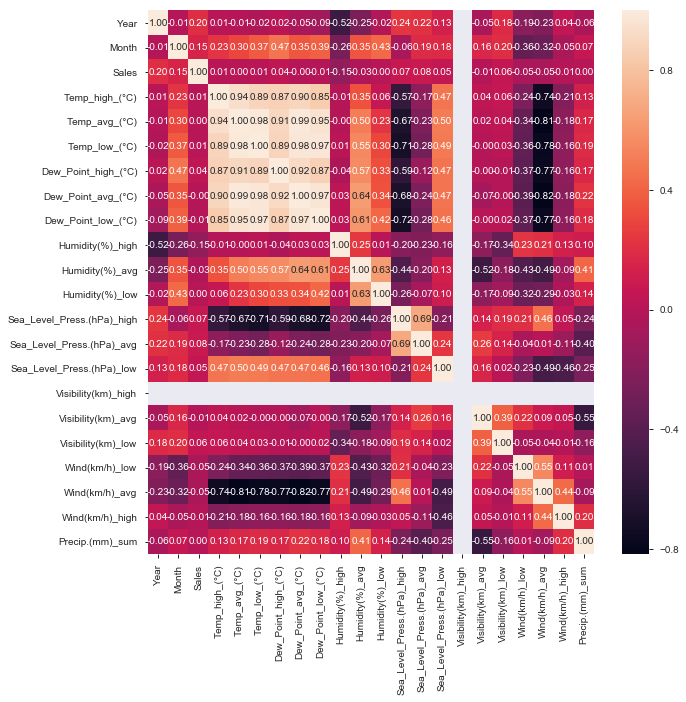

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(wtrain.corr(),annot=True,fmt='.2f')
plt.show()

Based on profiling, dropping the following 6 columns:

- Dew_Point_high_(°C) is highly correlated with Dew_Point_avg_(°C) (ρ = 0.9201817996)
- Dew_Point_low_(°C) is highly correlated with Dew_Point_avg_(°C) (ρ = 0.968568848)
- Temp_avg_(°C) is highly correlated with Dew_Point_low_(°C) (ρ = 0.9528658422)
- Temp_high_(°C) is highly correlated with Temp_avg_(°C) (ρ = 0.9407274138)
- Temp_low_(°C) is highly correlated with Temp_avg_(°C) (ρ = 0.9797623952)
- Visibility(km)_high has constant value "16.0"

In [250]:
cols_to_drop = ['Temp high (°C)', 'Temp avg (°C)', 'Temp low (°C)', 'Dew Point high (°C)', 'Dew Point low (°C)', 
                'Visibility(km) high','Year']
wtrain.drop(cols_to_drop,axis=1,inplace=True)
wtest.drop(cols_to_drop,axis=1,inplace=True)

Separating input features and target variable

In [251]:
x = wtrain.drop('Sales',axis=1)
y = wtrain['Sales']

In [252]:
cat_cols = ['Month','ProductCategory']
x[cat_cols] = x[cat_cols].astype('category')

In [253]:
num_cols = x.select_dtypes(exclude='category').columns

One Hot Encoding

In [254]:
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)
wtest = pd.get_dummies(wtest, columns=cat_cols, drop_first=True)
x.head()

Dew Point avg (°C)  Humidity(%) high  Humidity(%) avg  Humidity(%) low  \
0           -9.903226             100.0        57.354839             22.0   
1           -9.903226             100.0        57.354839             22.0   
2           -9.903226             100.0        57.354839             22.0   
3           -6.392857             100.0        54.000000             20.0   
4           -6.392857             100.0        54.000000             20.0   

   Sea Level Press.(hPa) high  Sea Level Press.(hPa) avg  \
0                      1036.0                1015.967742   
1                      1036.0                1015.967742   
2                      1036.0                1015.967742   
3                      1032.0                1017.071429   
4                      1032.0                1017.071429   

   Sea Level Press.(hPa) low  Visibility(km) avg  Visibility(km) low  \
0                      986.0           14.000000                 0.0   
1                      986.0           14.000000                 0.0   
2                      986.0           14.000000                 0.0   
3                      992.0           15.178571                 0.0   
4                      992.0           15.178571                 0.0   

   Wind(km/h) low  ...  Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  \
0            14.0  ...        0        0        0        0        0         0   
1            14.0  ...        0        0        0        0        0         0   
2            14.0  ...        0        0        0        0        0         0   
3            19.0  ...        0        0        0        0        0         0   
4            19.0  ...        0        0        0        0        0         0   

   Month_11  Month_12  ProductCategory_OtherClothing  \
0         0         0                              0   
1         0         0                              0   
2         0         0                              1   
3         0         0                              0   
4         0         0                              0   

   ProductCategory_WomenClothing  
0                              1  
1                              0  
2                              0  
3                              1  
4                              0  

[5 rows x 26 columns]

Train Test Split

In [255]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

Scaling Numerical columns

In [256]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain.loc[:,num_cols] = sc.fit_transform(xtrain[num_cols])
xtest.loc[:,num_cols] = sc.transform(xtest[num_cols])
wtest.loc[:,num_cols] = sc.transform(wtest[num_cols])
xtrain.head()

Dew Point avg (°C)  Humidity(%) high  Humidity(%) avg  Humidity(%) low  \
122            1.352189          0.437244         0.713848        -0.017735   
83             0.693175          0.437244         1.422354        -0.689319   
19             1.218272          0.437244         1.252929         0.318056   
154            1.542493          0.437244         0.754921         1.661224   
107           -0.445123          0.437244        -0.585080        -2.200383   

     Sea Level Press.(hPa) high  Sea Level Press.(hPa) avg  \
122                   -0.739018                  -0.114560   
83                    -0.938524                  -0.389585   
19                    -0.739018                  -0.827125   
154                   -0.539511                   0.410488   
107                    1.256049                   1.385577   

     Sea Level Press.(hPa) low  Visibility(km) avg  Visibility(km) low  \
122                   1.490922            0.697539           -0.693528   
83                    0.543669           -1.892753           -0.693528   
19                    1.017296           -0.899216           -0.693528   
154                   0.662076           -0.686316           -0.693528   
107                   0.306856            0.378188           -0.693528   

     Wind(km/h) low  ...  Month_5  Month_6  Month_7  Month_8  Month_9  \
122       -0.894607  ...        0        0        0        1        0   
83        -1.238873  ...        1        0        0        0        0   
19         0.138191  ...        0        0        1        0        0   
154       -0.206075  ...        0        0        1        0        0   
107        0.826723  ...        0        0        0        0        0   

     Month_10  Month_11  Month_12  ProductCategory_OtherClothing  \
122         0         0         0                              0   
83          0         0         0                              1   
19          0         0         0                              0   
154         0         0         0                              0   
107         0         0         0                              0   

     ProductCategory_WomenClothing  
122                              1  
83                               0  
19                               0  
154                              0  
107                              1  

[5 rows x 26 columns]

## Linear Regression

In [257]:
import statsmodels.api as sm
xtrain_sm = sm.add_constant(xtrain)
ols = sm.OLS(ytrain,xtrain_sm).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     49.36
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           1.46e-50
Time:                        16:17:47   Log-Likelihood:                -1038.8
No. Observations:                 142   AIC:                             2132.
Df Residuals:                     115   BIC:                             2211.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           603.7137    364.536      1.656      0.100    -118.362    1325.789
Dew Point avg (°C)              229.6756    287.992      0.798      0.427    -340.780     800.131
Humidity(%) high                -89.0239     50.006     -1.780      0.078    -188.077      10.029
Humidity(%) avg                -211.9370    116.607     -1.818      0.072    -442.912      19.038
Humidity(%) low                  39.9677     68.895      0.580      0.563     -96.500     176.436
Sea Level Press.(hPa) high      144.5950     84.840      1.704      0.091     -23.457     312.647
Sea Level Press.(hPa) avg       -66.6880     73.212     -0.911      0.364    -211.708      78.332
Sea Level Press.(hPa) low        52.6208     57.648      0.913      0.363     -61.568     166.810
Visibility(km) avg             -136.7721     75.492     -1.812      0.073    -286.308      12.764
Visibility(km) low               73.1421     50.169      1.458      0.148     -26.233     172.517
Wind(km/h) low                   -0.2303     58.539     -0.004      0.997    -116.185     115.724
Wind(km/h) avg                 -205.0395    105.427     -1.945      0.054    -413.870       3.791
Wind(km/h) high                  68.6705     51.782      1.326      0.187     -33.900     171.241
Precip.(mm) sum                 -10.6043     50.441     -0.210      0.834    -110.519      89.311
Month_2                         -41.0035    175.458     -0.234      0.816    -388.551     306.544
Month_3                         286.0166    259.615      1.102      0.273    -228.230     800.264
Month_4                          12.8758    376.918      0.034      0.973    -733.727     759.479
Month_5                          36.1668    494.239      0.073      0.942    -942.826    1015.160
Month_6                        -211.3034    609.237     -0.347      0.729   -1418.085     995.479
Month_7                        -384.0932    695.672     -0.552      0.582   -1762.086     993.899
Month_8                        -375.9324    651.566     -0.577      0.565   -1666.560     914.695
Month_9                        -101.5772    583.427     -0.174      0.862   -1257.234    1054.080
Month_10                        -44.5618    442.605     -0.101      0.920    -921.278     832.154
Month_11                        205.0635    315.328      0.650      0.517    -419.541     829.668
Month_12                       1073.2017    205.065      5.233      0.000     667.008    1479.395
ProductCategory_OtherClothing   489.9178     86.846      5.641      0.000     317.892     661.943
ProductCategory_WomenClothing  2652.4766     84.989     31.210      0.000    2484.129    2820.824
==============================================================================
Omnibus:                        8.058   Durbin-Watson:          

In [258]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [259]:
from sklearn.metrics import mean_squared_error, r2_score
train_pred = lm.predict(xtrain)
print('Training RMSE =', np.sqrt(mean_squared_error(ytrain,train_pred)))

test_pred = lm.predict(xtest)
print('Test RMSE =', np.sqrt(mean_squared_error(ytest,test_pred)))

Training RMSE = 363.801325001281
Test RMSE = 345.29806690090794


This is a Good fit model

In [260]:
test_pred = lm.predict(wtest)
submitdf = pd.DataFrame({'S.No.':np.arange(1,37), 'Sales':test_pred})
submitdf.to_csv('submission-lr1.csv',index=False)

## Random Forest

In [261]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [262]:
train_pred = rf.predict(xtrain)
print('Training RMSE =', np.sqrt(mean_squared_error(ytrain,train_pred)))

test_pred = rf.predict(xtest)
print('Test RMSE =', np.sqrt(mean_squared_error(ytest,test_pred)))

Training RMSE = 143.70879666685897
Test RMSE = 428.6349623721121


Undefit model

In [263]:
test_pred = rf.predict(wtest)
submitdf = pd.DataFrame({'S.No.':np.arange(1,37), 'Sales':test_pred})
submitdf.to_csv('submission-rf1.csv',index=False)

## AdaBoost

In [264]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(xtrain,ytrain)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [265]:
train_pred = ab.predict(xtrain)
print('Training RMSE =', np.sqrt(mean_squared_error(ytrain,train_pred)))

test_pred = ab.predict(xtest)
print('Test RMSE =', np.sqrt(mean_squared_error(ytest,test_pred)))

Training RMSE = 229.43553586746532
Test RMSE = 415.745599501026


In [266]:
test_pred = ab.predict(wtest)
submitdf = pd.DataFrame({'S.No.':np.arange(1,37), 'Sales':test_pred})
submitdf.to_csv('submission-ab1.csv',index=False)

## Gradient Boosting

In [267]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(xtrain,ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [268]:
train_pred = gb.predict(xtrain)
print('Training RMSE =', np.sqrt(mean_squared_error(ytrain,train_pred)))

test_pred = gb.predict(xtest)
print('Test RMSE =', np.sqrt(mean_squared_error(ytest,test_pred)))

Training RMSE = 72.45493695406903
Test RMSE = 389.79653468385067


This is giving the best result out of all the models tried until now.

In [269]:
test_pred = gb.predict(wtest)
submitdf = pd.DataFrame({'S.No.':np.arange(1,37), 'Sales':test_pred})
submitdf.to_csv('submission-gb1.csv',index=False)

### Fine tuning Gradient Boosting

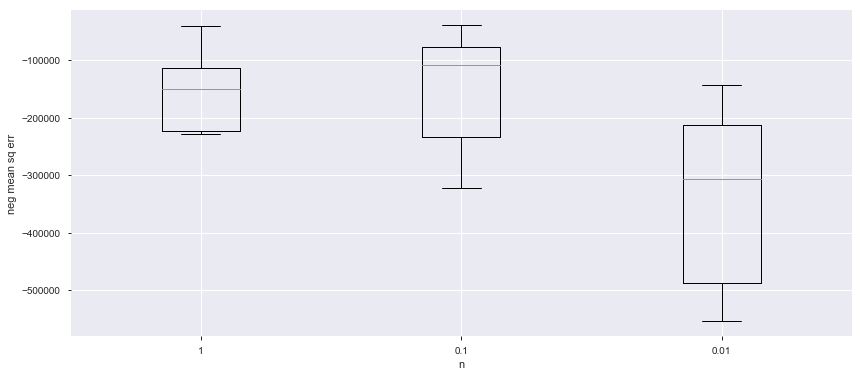

In [276]:
from sklearn.model_selection import cross_val_score
arr=[1,0.1,0.01]
cv_scores = []
for a in arr:
    model = GradientBoostingRegressor(learning_rate=a)
    cv_scores.append(cross_val_score(model, xtrain, ytrain, cv=10, scoring='neg_mean_squared_error'))
    
fig, ax = plt.subplots(figsize=(14,6))
plt.boxplot(cv_scores)
ax.set_xticklabels(arr)
plt.xlabel('n')
plt.ylabel('neg mean sq err')
plt.show()

In [285]:
from sklearn.model_selection import GridSearchCV
param_grid = {'loss': ['ls','lad','huber','quantile'],
             'max_features': [5,10,15,20]}
gb = GradientBoostingRegressor()
grid_gb = GridSearchCV(gb, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_gb.fit(xtrain,ytrain)
print(grid_gb.best_params_)

{'loss': 'ls', 'max_features': 20}


C:\Users\mohit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [286]:
model = grid_gb.best_estimator_
train_pred = grid_gb.predict(xtrain)
print('Training RMSE =', np.sqrt(mean_squared_error(ytrain,train_pred)))

test_pred = grid_gb.predict(xtest)
print('Test RMSE =', np.sqrt(mean_squared_error(ytest,test_pred)))

Training RMSE = 78.2380290420299
Test RMSE = 370.86244521754196


In [287]:
test_pred = grid_gb.predict(wtest)
submitdf = pd.DataFrame({'S.No.':np.arange(1,37), 'Sales':test_pred})
submitdf.to_csv('submission-gb3.csv',index=False)

In [ ]:
gb = GradientBoostingRegressor()
n = np.arange(10, 200, 2)